##### Importing required libraries

In [1]:
import requests # getting url data
from bs4 import BeautifulSoup # data parsing library
import numpy as np # data handling library
import pandas as pd # data manipulation library
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library

## Web Scrapping Part

In [2]:
url = r'https://www.worldometers.info/world-population/population-by-country/' # URL to fetch
 
page = requests.get(url) # getting data from URL and assigning it

soup = BeautifulSoup(page.content, 'html.parser') # creating soup object

table_data = soup.find(id= "example2") # getting html data by id

headers = table_data.find_all('th') # getting html data by table head
variables = [] # empty list for variable names for our dataset
for i in headers: # iterating in table head values
    variables.append(i.text) # adding in our empty list
variables.remove('#') # removing first values that was #
variables.insert(0,'Index') # inserting Index as values at first position
row_data = [] # empty list for observation data for our dataset
table_rows = table_data.find_all('tr') # getting html data by table rows
for tr in table_rows: # iterating in table rows values
    td = tr.find_all('td') # getting html data by tag table data
    row = [tr.text for tr in td] # getting text of table data
    row_data.append(row) # adding in our empty list row data
del row_data[0] # deleting first entry as it was empty data


df = pd.DataFrame(row_data,columns=variables) # making Dataframe from the scrapped data
# df.to_csv('worldometer.csv') # run for first time only to create a csv of extracted data


## Analysis Part

### **Introduction**

This URL is of WorldoMeter page.

Worldometer is run by an international team of developers, researchers, and volunteers with the goal of making world statistics available in a thought-provoking and time relevant format to a wide audience around the world. It is published by a small and independent digital media company based in the United States.

**How it works**

For the COVID-19 data, they collect data from official reports, directly from Government's communication channels or indirectly, through local media sources when deemed reliable. They provide the source of each data update in the "Latest Updates" (News) section. Timely updates are made possible thanks to the participation of users around the world and to the dedication of a team of analysts and researchers who validate data from an ever-growing list of over 5,000 sources.


| **Variable**| **Description**| **Type** |
| - | - | - |
|**Index**| Index number of the dataset |categorical|
|**Country (or dependency)**| Country names |categorical|
|**Population (2020)**| Total population in country |numerical|
|**Yearly Change**| Change percentage by year |numerical|
|**Net Change**| total Change in numbers |numerical|
|**Density (P/KmÂ²)**| Density of the country |numerical|
|**Land Area (KmÂ²)**| Total land area |numerical|
|**Migrants (net)**| Migrants Population |numerical|
|**Fert. Rate**| Fertility Rate |numerical|
|**Med. Age**| Median Age |numerical|
|**Urban Pop %**| Urban population in percentge |numerical|
|**World Share**| World share in percentge |numerical|



Count of variables we have:

|**Type**|**Count**|
|-|-|
|**categorical**|2|
|**numerical**|10|

#### **Number of variables and observation we have scrapped**

In [3]:
df.shape # shape of our data

(235, 12)

In [4]:
print('Number of observations    : ', df.shape[0]) # number of rows in dataset
print('Number of variables       : ', df.shape[1]) # number of columns in dataset

Number of observations    :  235
Number of variables       :  12


In [5]:
df = df.drop_duplicates() # dropping duplicates
df.shape # checking shape of data after dropping duplicates

(235, 12)

In [6]:
df.columns # columns we have in our dataset


Index(['Index', 'Country (or dependency)', 'Population (2020)',
       'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)',
       'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %',
       'World Share'],
      dtype='object')

In [7]:
df = df.drop(columns='Index') # dropping Index as we pandas already have that

#### **Checking for any missing value in the scrapped dataset.**

In [8]:
df.head() # viewing first 5 rows

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [9]:
df.tail() # viewing last 5 rows

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
230,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %
234,Holy See,801,0.25 %,2,"2,003",0,,N.A.,N.A.,N.A.,0.00 %


- we can see that there are null values written as N.A. in our dataset
- also we have blank values in migrants variable which can be considered as null values

In [10]:
df.info() # checking for null values and data types of variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country (or dependency)  235 non-null    object
 1   Population (2020)        235 non-null    object
 2   Yearly Change            235 non-null    object
 3   Net Change               235 non-null    object
 4   Density (P/Km²)          235 non-null    object
 5   Land Area (Km²)          235 non-null    object
 6   Migrants (net)           235 non-null    object
 7   Fert. Rate               235 non-null    object
 8   Med. Age                 235 non-null    object
 9   Urban Pop %              235 non-null    object
 10  World Share              235 non-null    object
dtypes: object(11)
memory usage: 22.0+ KB


In [11]:
df.isna().sum() # total null values in our dataset

Country (or dependency)    0
Population (2020)          0
Yearly Change              0
Net Change                 0
Density (P/Km²)            0
Land Area (Km²)            0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   0
Urban Pop %                0
World Share                0
dtype: int64

- null values are not reflecting here then they must be as string in our dataset
- also many variables are wrongly readed

In [12]:
df = df.replace({ "N.A.":np.nan}) # replacing N.A. values to nan values
df = df.replace({ " ":np.nan}) # replacing empty values to nan values

In [13]:
df.tail() # viewing last 5 observation

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
230,Montserrat,"4,992",0.06 %,3,50,100,NaN,NaN,NaN,10 %,0.00 %
231,Falkland Islands,"3,480",3.05 %,103,0,"12,170",NaN,NaN,NaN,66 %,0.00 %
232,Niue,"1,626",0.68 %,11,6,260,NaN,NaN,NaN,46 %,0.00 %
233,Tokelau,"1,357",1.27 %,17,136,10,NaN,NaN,NaN,0 %,0.00 %
234,Holy See,801,0.25 %,2,"2,003",0,NaN,NaN,NaN,NaN,0.00 %


In [14]:
df.isna().sum() # total null values in our dataset

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                13
World Share                 0
dtype: int64

- now we can see that how much is our null values in each variables
- Migrants, Fert. Rate, Med. Age, Urban Pop % have missing values

#### **Renaming variables for better analysis.**

In [15]:
df.columns # viewing columns we have

Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [16]:
# renaming variables for better analysis 
df = df.rename(columns={
    'Country (or dependency)':'country',
    'Population (2020)':'population',
    'Yearly Change':'yearly_change',
    'Net Change':'net_change',
    'Density (P/Km²)':'density',
    'Land Area (Km²)':'land_area',
    'Migrants (net)':'migrants',
    'Fert. Rate':'fertility_rate',
    'Med. Age':'med_age',
    'Urban Pop %':'urban_pop',
    'World Share':'world_share',
})

In [17]:
df.columns # viewing columns we have

Index(['country', 'population', 'yearly_change', 'net_change', 'density',
       'land_area', 'migrants', 'fertility_rate', 'med_age', 'urban_pop',
       'world_share'],
      dtype='object')

- now we can see that our variables have been renamed in a proper way

In [18]:
comma_dtype = ['population','net_change','density','land_area','migrants','fertility_rate','med_age'] # selecting variables with comma in their entries
for i in comma_dtype: # iterating in variable having comma in their entries
    df[i] = df[i].str.replace(',', '') # removing comma from entries
df['yearly_change'] = df['yearly_change'].str.replace('%', '') # removing % sign from entries
df['urban_pop'] = df['urban_pop'].str.replace('%', '') # removing % sign from entries
df['world_share'] = df['world_share'].str.replace('%', '') # removing % sign from entries

- here I removed comma signs having in numeric variable and also for % signs so that it can be convert into numeric data

In [19]:
# selecting data types that wrongly read
chnge_dtype = ['population','yearly_change','net_change','density','land_area','migrants','fertility_rate','med_age','urban_pop','world_share']
for i in chnge_dtype: # iterating through wrongly read data type
    df[i] =  pd.to_numeric(df[i], errors='coerce') # changing their data type to numeric 

In [20]:
df.info() # confirming or data type got changed or not also for null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         235 non-null    object 
 1   population      235 non-null    int64  
 2   yearly_change   235 non-null    float64
 3   net_change      235 non-null    int64  
 4   density         235 non-null    int64  
 5   land_area       235 non-null    int64  
 6   migrants        201 non-null    float64
 7   fertility_rate  201 non-null    float64
 8   med_age         201 non-null    float64
 9   urban_pop       222 non-null    float64
 10  world_share     235 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 22.0+ KB


#### **Top three countries based on the density variable.**

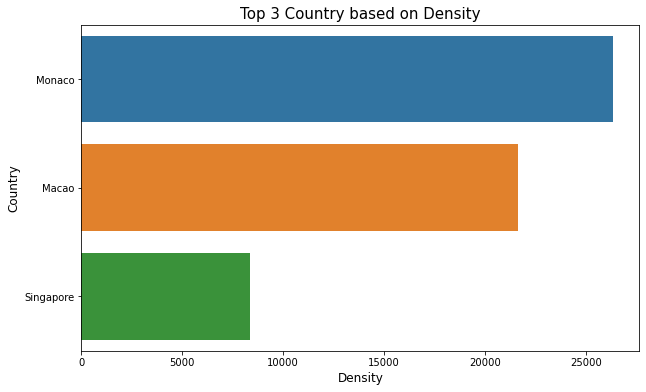

In [21]:
plt.figure(figsize=(10,6)) # figure size
sns.barplot(data=df.sort_values('density',ascending=False).head(3), x = 'density', y='country') # configuring the bar plot
plt.title('Top 3 Country based on Density',fontsize = 15) # giving title and its size
plt.xlabel('Density', fontsize = 12) # giving x-axis title and its size
plt.ylabel('Country', fontsize = 12) # giving y-axis title and its size
plt.show() # visualizing the chart

#### **Country that has the highest and lowest fertility rate.**

In [22]:
high_fertility = df.sort_values('fertility_rate',ascending=False).head(1) # sorting to highest fertility
high_fertility 

,country,population,yearly_change,net_change,density,land_area,migrants,fertility_rate,med_age,urban_pop,world_share
55,Niger,24206644,3.84,895929,19,1266700,4000.0,7.0,15.0,17.0,0.31


In [23]:
lowest_fertility = df.sort_values('fertility_rate').head(1) # sorting to lowest fertility 
lowest_fertility

,country,population,yearly_change,net_change,density,land_area,migrants,fertility_rate,med_age,urban_pop,world_share
27,South Korea,51269185,0.09,43877,527,97230,11731.0,1.1,44.0,82.0,0.66


- niger country has the highest fertility rate of 7.0
- South Korea has the lowest fertility rate of 1.1

#### **Examining the distribution of Population, Median age and Urban population and Yearly change.**

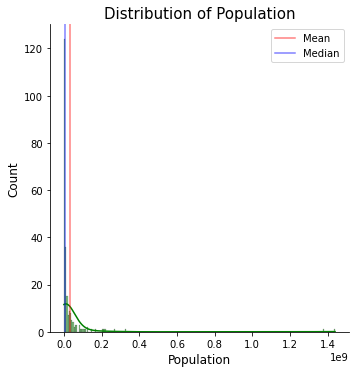

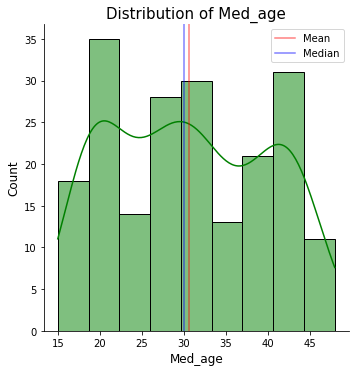

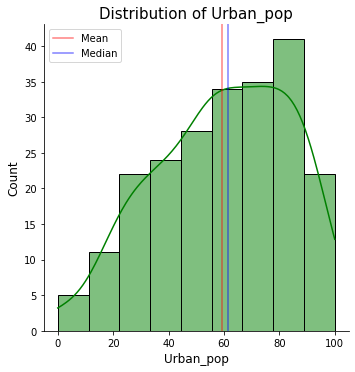

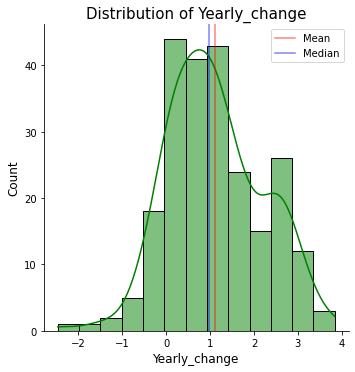

In [24]:
dist_col = ['population', 'med_age', 'urban_pop', 'yearly_change'] # columns to show distribution
for i in dist_col: # iterating
    sns.displot(data=df, x = i, kde=True, color='green') # configuring our distribution chart
    plt.axvline(x=df[i].mean(), color='red', alpha=0.5, label= 'Mean') # creating Mean line in chart
    plt.axvline(x=df[i].median(), color='blue', alpha=0.5, label= 'Median') # creating Median line in chart
    plt.title(f'Distribution of {i.capitalize()}', fontsize = 15) # giving title and its size
    plt.xlabel(f'{i.capitalize()}',fontsize = 12) # giving x-axis title and its size
    plt.ylabel('Count',fontsize = 12) # giving y-axis title and its size
    plt.legend() # for showing legend in chart
    plt.show() # visualizing the chart`

In [25]:
for i in dist_col:
    print(f'     {i.capitalize()}        ')
    print('Mean     : ' , round(df[i].mean(),2)) # mean 
    print('Median   : ' , round(df[i].median(),2)) # median 
    print('Skewness : ' , round(df[i].skew(),2)) # skewness 
    print()

     Population        
Mean     :  33171202.68
Median   :  5459642.0
Skewness :  9.23

     Med_age        
Mean     :  30.62
Median   :  30.0
Skewness :  0.11

     Urban_pop        
Mean     :  59.45
Median   :  61.5
Skewness :  -0.36

     Yearly_change        
Mean     :  1.1
Median   :  0.97
Skewness :  0.16



**Conclusion**
| **skew** | **range**| **variable** |
| - | - | - |
| **highly** | <-1 & >1 | Population |
| **moderate** | (-1 to -0.5) & (0.5 to 1)| None |
| **symmetrical** | -0.5 to 0.5 | Median Age, Urban Population, Yearly Change |

#### **Sorting population variable based on lowest populated countries**

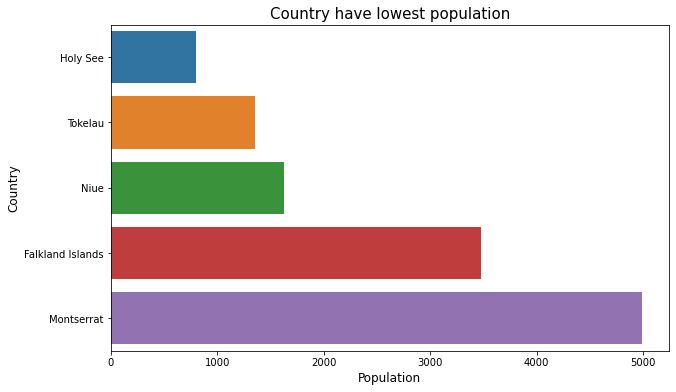

In [26]:
sorted_population = df.sort_values('population') # dataframe with sorted population column
plt.figure(figsize=(10,6)) # figure size
sns.barplot(data=sorted_population.head(5), x = 'population', y='country') # configuring our bar plot
plt.title('Country have lowest population',fontsize = 15) # giving title and its size
plt.xlabel('Population', fontsize = 12) # giving x-axis title and its size
plt.ylabel('Country', fontsize = 12) # giving y-axis title and its size
plt.show() # visualizing the chart

- Holy See has lowest population followed by Tokelau, Niue, Falkland Islands and Montserrat.